###  1. 数据载入和总览

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

from pandas import Series,DataFrame

#### 1.1 数据载入

In [2]:
%%time
contb1 = pd.read_csv('./usa_elect/contb_01.csv')
contb2 = pd.read_csv('./usa_elect/contb_02.csv')
contb3 = pd.read_csv('usa_elect/contb_03.csv')

Wall time: 1.74 s


#### 1.2 数据合并

In [3]:
contb1.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [4]:
contb3.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Perry, Rick","NORRIS, BOBBY",TX,SELF,REALTOR/ RANCHER,1000.0,14-DEC-11
1,"Perry, Rick","HUNT, CAROLINE",TX,HOMEMAKER,HOMEMAKER,2500.0,14-DEC-11
2,"Perry, Rick","ROBINOWITZ, DALE",TX,SELF-EMPLOYED,DENTIST,2500.0,14-DEC-11
3,"Perry, Rick","ZUNIGA, DAVID & SYLVIA",TX,DAVID M. ZUNIGA PE,OWNER,250.0,14-DEC-11
4,"Perry, Rick","FOSTER, GLENNA",TX,SELF,INVESTOR/ CONSULTANT,1500.0,14-DEC-11


In [5]:
contb = pd.concat([contb1,contb2,contb3],axis = 0)

#### 1.3 数据预览和基本统计分析

In [6]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [7]:
contb.shape

(1001733, 7)

In [8]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [9]:
contb.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


### 2. 数据清洗

#### 2.1 缺失值处理

In [10]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [11]:
cond = contb['contbr_employer'].isnull()
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.00,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.00,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.00,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.00,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.00,20-JAN-12
1041,"Romney, Mitt","HEAD, ROBERT",AL,NaN,NaN,-2000.00,29-NOV-11
1061,"Romney, Mitt","SELLERS, WILL",AL,NaN,NaN,-165.43,06-DEC-11
1062,"Romney, Mitt","THOMPSON, MICHAEL",AL,NaN,NaN,-2500.00,20-OCT-11
1063,"Romney, Mitt","WARD, CAM",AL,NaN,NaN,-6.00,16-NOV-11
1267,"Romney, Mitt","RITTER, SUSAN B. MRS.",AL,NaN,CIVIC VOLUNTEER,2500.00,09-AUG-11


In [12]:
# 没有提供NOT PROVIDE 公司保密，没有来得及写
contb['contbr_employer'].fillna('NOT PROVIDE',inplace = True)

In [13]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [14]:
contb['contbr_occupation'].fillna('NOT PROVIDE',inplace = True)

In [15]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [16]:
cond = contb['contbr_st'].isnull()
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
453997,"Obama, Barack","NEWBURG, ANDRE",NaN,NOT EMPLOYED,RETIRED,1000.0,01-DEC-11
453998,"Obama, Barack","HARBARD, SONJA",NaN,SELF-EMPLOYED,WRITER,250.0,31-MAR-12
453999,"Obama, Barack","LAKIN-THOMAS, PATRICIA",NaN,YORK UNIVERSITY,UNIVERSITY PROFESSOR,300.0,31-MAR-12
454000,"Obama, Barack","MICHAEALS, MARNIN",NaN,BAKER & MCKENZIE ZURICH,ATTORNEY,250.0,31-MAR-12


In [17]:
contb['contbr_st'].fillna('NOT PROVIDE',inplace = True)

In [18]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001733 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


#### 2.2 数据转换
#### 利用字典映射进行转换：党派分析

In [19]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [20]:
contb.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [21]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [22]:
%%time
# map中可以传递字典，100万数据，增加一列耗时125ms
contb['party'] = contb['cand_nm'].map(parties)

Wall time: 128 ms


In [23]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [24]:
contb['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [25]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [26]:
contb.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

#### 排序：按照职业汇总对赞助总金额进行排序

In [27]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()


In [83]:
occupation = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
             'INFORMATION REQUESTED':'NOT PROVIDE',
              'C.E.O.':'CEO',
              'LAWYER':'ATTORNEY',
              'SELF':'SELF-EMPLOYED',
              'SELF EMPLOYED ':'SELF-EMPLOYED'}

In [29]:
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDE                                4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [84]:
f = lambda x : occupation.get(x,x)
contb['contbr_occupation'] = contb['contbr_occupation'].map(f)

In [31]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                  48176647.00
NOT PROVIDE              28826632.53
ATTORNEY                 22008455.49
HOMEMAKER                17484807.65
PHYSICIAN                 7224044.40
PRESIDENT                 6347843.59
EXECUTIVE                 5273717.90
CONSULTANT                4932627.98
CEO                       3594443.20
OWNER                     3278488.16
INVESTOR                  3204481.92
ENGINEER                  2730527.43
SELF-EMPLOYED             2628341.10
PROFESSOR                 2458033.81
C.E.O.                    2433218.11
MANAGER                   2167571.47
REAL ESTATE               2110499.34
SALES                     1814901.82
NOT EMPLOYED              1752927.93
BUSINESS OWNER            1736511.73
TEACHER                   1709754.05
CHAIRMAN                  1691595.37
STUDENT                   1679435.28
FINANCE                   1664021.31
BANKER                    1462903.13
WRITER                    1303267.29
PARTNER             

按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达不一样而已，如C.E.O.与CEO，都是一个职业

#### 利用函数进行数据转换：职业与雇主信息分析

建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO

In [32]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [81]:
employer = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
            'INFORMATION REQUESTED':'NOT PROVIDE',
            'SELF':'SELF-EMPLOYED',
            'SELF EMPLOYED':'SELF-EMPLOYED'}

In [34]:
# 按照公司进行统计，汇总
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:50]

contbr_employer
RETIRED                                   41374333.67
SELF-EMPLOYED                             28745318.28
INFORMATION REQUESTED PER BEST EFFORTS    16629440.70
HOMEMAKER                                 14738524.86
INFORMATION REQUESTED                      8997347.66
NOT EMPLOYED                               8636809.43
NOT PROVIDE                                5655209.40
SELF                                       5243486.83
NONE                                       3809582.99
SELF EMPLOYED                              3495090.11
STUDENT                                     957971.85
REQUESTED                                   894009.54
MORGAN STANLEY                              386129.40
UNEMPLOYED                                  377088.31
INFORMATION REQUESTED (BEST EFFORTS)        340503.63
CREDIT SUISSE                               300740.90
VOLUNTEER                                   294118.02
MICROSOFT                                   286304.32
GOLDMAN SACH

In [82]:
f = lambda x : employer.get(x,x)
contb['contbr_employer'] = contb['contbr_employer'].map(f)

In [51]:
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:50]

contbr_employer
RETIRED                                 41374333.67
SELF-EMPLOYED                           37483895.22
NOT PROVIDE                             31281997.76
HOMEMAKER                               14738524.86
NOT EMPLOYED                             8636809.43
NONE                                     3809582.99
STUDENT                                   957971.85
REQUESTED                                 894009.54
MORGAN STANLEY                            386129.40
UNEMPLOYED                                377088.31
INFORMATION REQUESTED (BEST EFFORTS)      340503.63
CREDIT SUISSE                             300740.90
VOLUNTEER                                 294118.02
MICROSOFT                                 286304.32
GOLDMAN SACH & CO.                        233250.00
US ARMY                                   230796.52
GOLDMAN SACHS                             205338.57
BANK OF AMERICA                           197408.93
IBM                                       197129

#### 2.3 数据筛选

赞助金额筛选

In [85]:
# 捐赠金额大于0
contb_ = contb[contb['contb_receipt_amt'] > 0]
contb_.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [46]:
contb_.contbr_occupation.isin(['C.E.O']).sum()

0

In [54]:
contb.shape

(1001733, 8)

In [55]:
contb_.shape

(991477, 8)

In [59]:
#查看各候选人获得的赞助总金额
cand_nm_amt = contb_.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending = False)

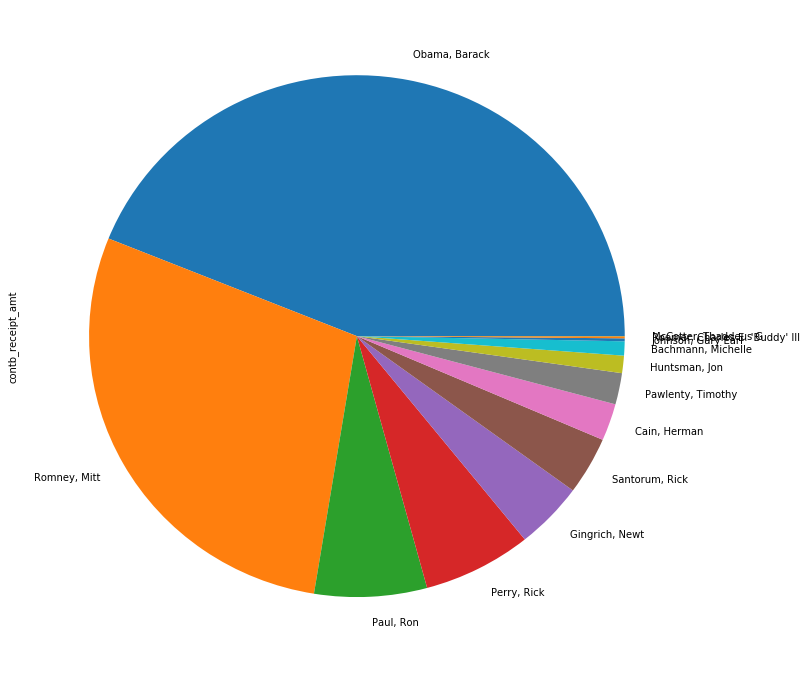

In [64]:
plt.figure(figsize=(12,12))
cand_nm_amt.plot(kind = 'pie')

In [65]:
contb_.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [86]:
#选取候选人为Obama、Romney的子集数据
# 方式一：
cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'

cond = cond1|cond2
contb_vs = contb_[cond]
contb_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
416,"Romney, Mitt","WILSON, ANDREW C. MR.",AE,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,Republican
417,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,Republican
418,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,Republican
419,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,Republican
420,"Romney, Mitt","DELUCA, PIERRE MR.",AE,US ARMY,ENGINEER,50.0,01-FEB-12,Republican


In [70]:
contb_vs2 = contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")

In [71]:
contb_vs2.shape

(694283, 8)

In [73]:
cond = contb_['cand_nm'].isin(['Romney, Mitt','Obama, Barack'])
contb_vs3 = contb_[cond]

In [74]:
contb_vs3.shape

(694283, 8)

#### 2.4 面元化数据

接下来我们对该数据做另一种非常实用的分析，利用cut函数根据出资额大小将数据离散化到多个面元中

In [76]:

contb_.contb_receipt_amt.unique().sort_values()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [81]:
contb_.contb_receipt_amt.unique().size

7326

In [78]:
contb_.contb_receipt_amt.sort_values()

323688          0.01
327537          0.01
327468          0.01
326458          0.01
317091          0.01
317128          0.01
317170          0.01
317317          0.01
317634          0.01
317753          0.01
318560          0.01
318670          0.01
319373          0.01
319590          0.01
326172          0.01
328455          0.01
319758          0.01
344696          0.01
319831          0.01
344779          0.01
320056          0.01
344951          0.01
345103          0.01
320088          0.01
345478          0.01
345490          0.01
320138          0.01
320309          0.01
335767          0.01
320467          0.01
             ...    
41888       10000.00
208022      10000.00
209739      10000.00
208898      10000.00
210730      10000.00
209268      10000.00
209813      10000.00
209859      10000.00
91145       10000.00
208928      10000.00
210198      10000.00
208919      10000.00
90076       10000.00
493178      10000.00
209608      10000.00
423476      10000.00
376244      1

In [82]:
contb_['contb_receipt_amt'].max()

2014490.51

In [85]:
contb_['contb_receipt_amt'][:10]

0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
5    500.0
6    250.0
7    250.0
8    250.0
9    250.0
Name: contb_receipt_amt, dtype: float64

In [39]:
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]

labels = pd.cut(contb_['contb_receipt_amt'],bins)
labels

0         (100, 1000]
1           (10, 100]
2         (100, 1000]
3         (100, 1000]
4         (100, 1000]
5         (100, 1000]
6         (100, 1000]
7         (100, 1000]
8         (100, 1000]
9         (100, 1000]
10        (100, 1000]
11        (100, 1000]
12        (100, 1000]
13        (100, 1000]
14        (100, 1000]
15        (100, 1000]
16        (100, 1000]
17        (100, 1000]
18        (100, 1000]
19        (100, 1000]
20        (100, 1000]
21        (100, 1000]
22      (1000, 10000]
23      (1000, 10000]
24        (100, 1000]
25        (100, 1000]
26          (10, 100]
27        (100, 1000]
28        (100, 1000]
29        (100, 1000]
            ...      
1696      (100, 1000]
1697    (1000, 10000]
1698    (1000, 10000]
1699    (1000, 10000]
1700      (100, 1000]
1701    (1000, 10000]
1702    (1000, 10000]
1705      (100, 1000]
1706    (1000, 10000]
1708    (1000, 10000]
1711      (100, 1000]
1712    (1000, 10000]
1713    (1000, 10000]
1714      (100, 1000]
1715      

In [40]:
labels = pd.cut(contb_vs['contb_receipt_amt'],bins)
labels.shape

(694283,)

In [92]:
contb_vs['labels'] = labels
contb_vs.head()

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,labels
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican,"(10, 100]"
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican,"(100, 1000]"
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican,"(100, 1000]"
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican,"(10, 100]"
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican,"(10, 100]"


### 3. 数据聚合与分组运算

#### 3.1 透视表(pivot_table)分析党派和职业

In [86]:
contb_.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [61]:
contb_.shape

(991477, 8)

In [62]:
contb_.contbr_occupation.isin(['C.E.O.']).sum()

0

In [63]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
ret = contb_.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum',fill_value=0)
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.00
AREA VICE PRESIDENT,250.0,0.00
RESEARCH ASSOCIATE,100.0,0.00
TEACHER,500.0,0.00
THERAPIST,3900.0,0.00
'MIS MANAGER,0.0,177.60
(PART-TIME) SALES CONSULTANT & WRITER,0.0,285.00
(RETIRED),0.0,250.00
-,5000.0,2114.80


In [64]:
ret[ret.sum(axis = 1)>2000000]

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2075974.79,4.233742e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDE,13725187.32,2.097161e+07


In [102]:
ret.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0


In [101]:
ret.shape

(45063, 2)

In [98]:
index = Series(ret.sum(axis = 1).sort_values(ascending = False).index)

In [100]:
index.shape

(45063,)

In [99]:
ret[index]

KeyError: "['RETIRED' 'NOT PROVIDE' 'ATTORNEY' ... 'SR MGR'\n 'VICE PRESIDENT, REAL ESTATE' 'FREELANCE VOICE-OVER'] not in index"

In [104]:
ret.sum(axis = 1).sort_values(ascending = False)[:20]

contbr_occupation
RETIRED           4.886656e+07
NOT PROVIDE       3.469680e+07
ATTORNEY          2.217088e+07
HOMEMAKER         1.788315e+07
PHYSICIAN         7.329445e+06
PRESIDENT         6.599434e+06
EXECUTIVE         5.494011e+06
CONSULTANT        5.004638e+06
CEO               3.715043e+06
OWNER             3.409854e+06
INVESTOR          3.315902e+06
ENGINEER          2.769899e+06
SELF-EMPLOYED     2.682894e+06
C.E.O.            2.594673e+06
PROFESSOR         2.461774e+06
MANAGER           2.207416e+06
REAL ESTATE       2.154804e+06
SALES             1.848352e+06
CHAIRMAN          1.792640e+06
BUSINESS OWNER    1.773322e+06
dtype: float64

In [66]:
ret['total'] = ret['Democrat'] + ret['Republican']

In [106]:
ret.head()

party,Democrat,Republican,total
contbr_occupation,,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0,100.0
AREA VICE PRESIDENT,250.0,0.0,250.0
RESEARCH ASSOCIATE,100.0,0.0,100.0
TEACHER,500.0,0.0,500.0
THERAPIST,3900.0,0.0,3900.0


In [67]:
ret.sort_values(by = 'total',ascending=False)

party,Democrat,Republican,total
contbr_occupation,,,
RETIRED,25305316.38,2.356124e+07,4.886656e+07
NOT PROVIDE,13725187.32,2.097161e+07,3.469680e+07
ATTORNEY,14302461.84,7.868419e+06,2.217088e+07
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
PHYSICIAN,3735124.94,3.594320e+06,7.329445e+06
PRESIDENT,1878509.95,4.720924e+06,6.599434e+06
CEO,2075974.79,4.233742e+06,6.309716e+06
EXECUTIVE,1355161.05,4.138850e+06,5.494011e+06
CONSULTANT,2459912.71,2.544725e+06,5.004638e+06


In [68]:
#过滤掉赞助金额小于200W的数据

cond = ret['total'] < 2000000

index = ret[cond].index

ret_big = ret.drop(labels=index)

In [111]:
# 绘制献金前20数据
ret_big.shape

(17, 3)

In [112]:
ret_big

party,Democrat,Republican,total
contbr_occupation,,,
ATTORNEY,14302461.84,7.868419e+06,2.217088e+07
C.E.O.,1690.00,2.592983e+06,2.594673e+06
CEO,2074284.79,1.640758e+06,3.715043e+06
CONSULTANT,2459912.71,2.544725e+06,5.004638e+06
ENGINEER,951525.55,1.818374e+06,2.769899e+06
EXECUTIVE,1355161.05,4.138850e+06,5.494011e+06
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
INVESTOR,884133.00,2.431769e+06,3.315902e+06
MANAGER,762883.22,1.444532e+06,2.207416e+06


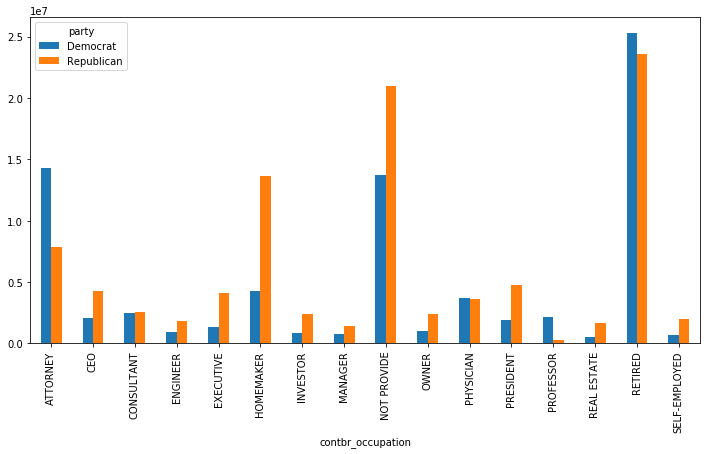

In [70]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
ret_big.iloc[:,:2].plot(kind = 'bar',ax = ax)

#### 3.2 分组级运算和转换

根据职业与雇主信息分组运算

In [72]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(grouped,key,n):
#     !!!先分组，grouped，然后继续再分
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]

grouped = contb_.groupby('cand_nm')


grouped.apply(get_top_amounts,'contbr_occupation',7)



cand_nm                         contbr_occupation                   
Bachmann, Michelle              RETIRED                                   854785.17
                                NOT PROVIDE                               167705.00
                                HOMEMAKER                                 105622.00
                                PHYSICIAN                                  77319.00
                                PRESIDENT                                  68831.00
                                OWNER                                      63790.00
                                CEO                                        56350.00
Cain, Herman                    NOT PROVIDE                              3791832.02
                                RETIRED                                   844671.47
                                HOMEMAKER                                 173888.07
                                PHYSICIAN                                 140190.96
       

In [75]:
grouped = contb_vs.groupby('cand_nm')

grouped.apply(get_top_amounts,'contbr_occupation',7).unstack(level = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,14302461.84,5372424.02
CEO,NaN,2343547.03
CONSULTANT,2459912.71,NaN
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
NOT PROVIDE,13725187.32,11638509.84
PHYSICIAN,3735124.94,NaN
PRESIDENT,NaN,2491244.89
PROFESSOR,2165071.08,NaN


In [119]:
for i in grouped:
    print(i)

('Bachmann, Michelle',                    cand_nm                           contbr_nm contbr_st  \
0       Bachmann, Michelle                     HARVEY, WILLIAM        AL   
1       Bachmann, Michelle                     HARVEY, WILLIAM        AL   
2       Bachmann, Michelle                       SMITH, LANIER        AL   
3       Bachmann, Michelle                    BLEVINS, DARONDA        AR   
4       Bachmann, Michelle                  WARDENBURG, HAROLD        AR   
5       Bachmann, Michelle                      BECKMAN, JAMES        AR   
6       Bachmann, Michelle                    BLEVINS, DARONDA        AR   
7       Bachmann, Michelle                    BLEVINS, DARONDA        AR   
8       Bachmann, Michelle                      COLLINS, SARAH        AZ   
9       Bachmann, Michelle                     COLEMAN, RONALD        AZ   
10      Bachmann, Michelle                  ATCHLEY, JR, KEITH        AZ   
11      Bachmann, Michelle                    FARNSWORTH, ROSS   

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [123]:
contb_vs.columns


Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [87]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped = contb_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_employer',10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDE           13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDE           12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

-----------------------------------------------------------

对赞助金额进行分组分析(matplotlib画图)

前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析

首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据

接下来，我们再统计各区间的赞助金额

In [130]:
contb_vs.groupby(['cand_nm'])['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    1.358776e+08
Romney, Mitt     8.833591e+07
Name: contb_receipt_amt, dtype: float64

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [89]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [93]:
contb_vs.groupby(['cand_nm','labels']).size().unstack(level = 0,fill_value = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
labels,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [95]:
#绘制Obama、Romney各区间赞助总金额
amt_vs = contb_vs.groupby(['cand_nm',labels])['contb_receipt_amt'].sum().unstack(level = 0,fill_value = 0)
amt_vs

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


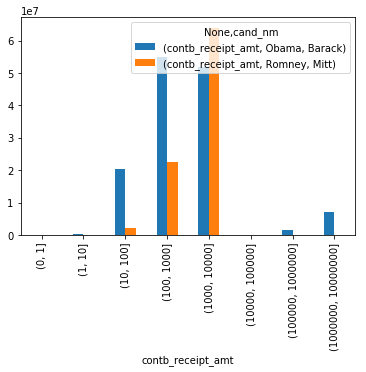

In [135]:
amt_vs.plot(kind = 'bar')

In [136]:
cond = contb_vs.contb_receipt_amt > 100000

contb_vs[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
257270,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,DC,NOT PROVIDE,NOT PROVIDE,451726.00,30-JUN-11,Democrat
319478,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,526246.17,30-APR-12,Democrat
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,2014490.51,29-FEB-12,Democrat
326651,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1944042.43,31-DEC-11,Democrat
335187,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,512710.91,31-JAN-12,Democrat
344419,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1511192.17,30-SEP-11,Democrat
344539,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1679114.65,31-MAR-12,Democrat


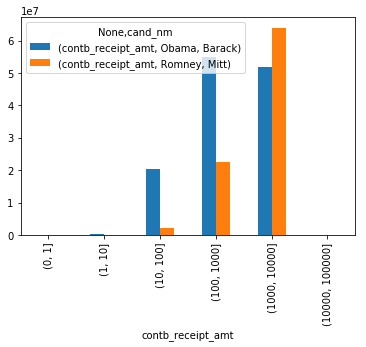

In [137]:
# 个人捐款
amt_vs[:-2].plot(kind = 'bar')

上图虽然能够大概看出Obama、Romney的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果会更好，下面我们就实现以下。

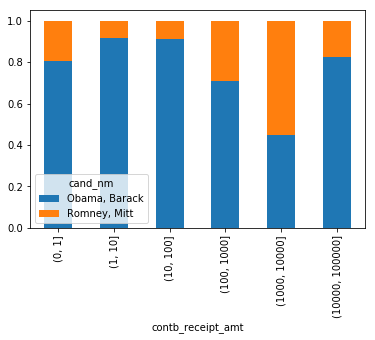

In [97]:
#算出每个区间两位候选人收到赞助总金额的占比
amt_vs_percent = amt_vs.div(amt_vs.sum(axis = 1),axis = 0)
# 百分比堆积图
amt_vs_percent[:-2].plot(kind = 'bar',stacked = True)

可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多

按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

### 4.时间处理

#### 4.1 str转datetime

In [143]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [144]:
contb_vs.dtypes

cand_nm               object
contbr_nm             object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
party                 object
dtype: object

In [101]:
contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt'])

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
contb_vs.dtypes


cand_nm                      object
contbr_nm                    object
contbr_st                    object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
party                        object
dtype: object

In [147]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02-01,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02-01,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,2012-04-13,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,2011-08-21,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,2012-03-07,Republican


#### 4.2 以时间作为索引

In [102]:
contb_vs_time = contb_vs.set_index('contb_receipt_dt')
contb_vs_time.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party,labels
contb_receipt_dt,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican,"(10, 100]"
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican,"(100, 1000]"
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican,"(100, 1000]"
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,Republican,"(10, 100]"
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican,"(10, 100]"


#### 4.3重采样和频度转换

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样

In [106]:
# 行索引是时间，那么我们就可以实现重采样
# D：天，M：月，Y：年
vs_month = contb_vs_time.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].count().unstack(level = 0)

In [161]:
contb_vs.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

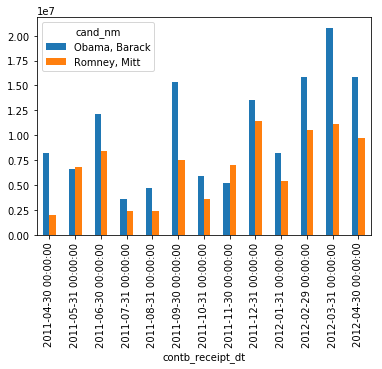

In [157]:
# 我们用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，
# 越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势
vs_m.plot(kind = 'bar')

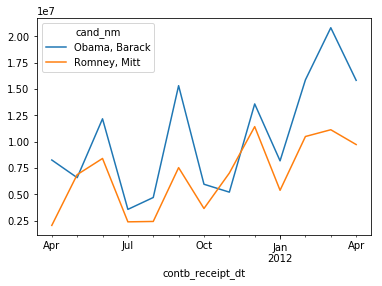

In [158]:
vs_m.plot(kind = 'line')

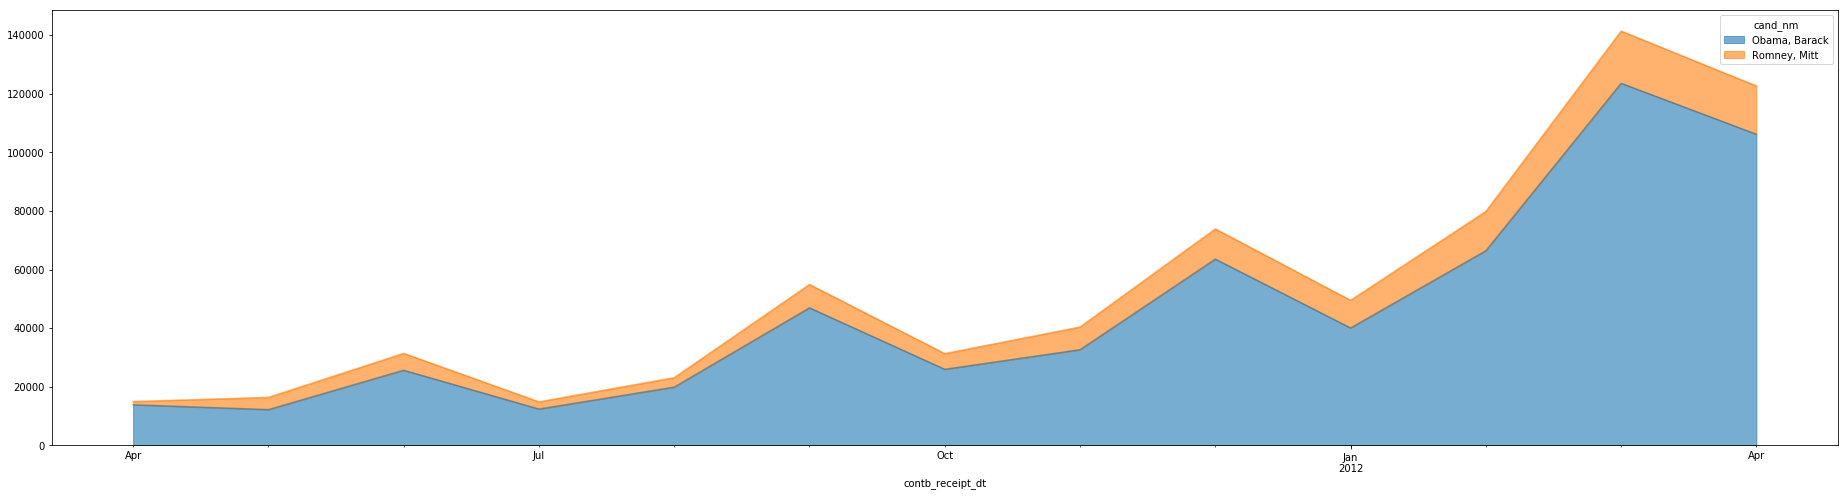

In [107]:
plt.figure(figsize=(32,8))
ax = plt.subplot(1,1,1)
vs_month.plot(kind = 'area',ax = ax,alpha = 0.6)

### 5.各州支持率

In [162]:
contb_vs.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [108]:
#依据州和候选人进行分组
state_vs = contb_vs.groupby(['cand_nm','contbr_st'])['contb_receipt_amt'].sum().unstack(level = 0)
state_vs

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
AP,37130.50,1655.00
AR,359247.28,105556.00
AS,2955.00,NaN
AZ,1506476.98,1888436.23


In [165]:
state_vs.fillna(0,inplace=True)

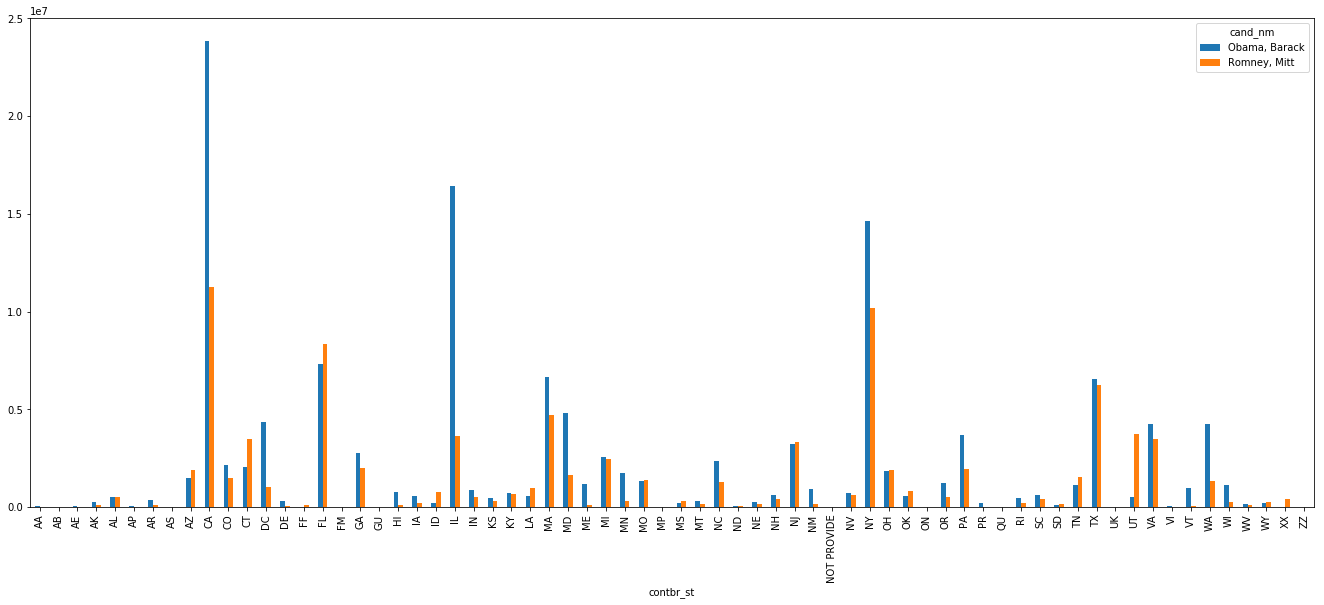

In [168]:
plt.figure(figsize=(23,9))

ax = plt.subplot(1,1,1)

state_vs.plot(kind = 'bar',ax = ax)

In [109]:
state_vs_rate = state_vs.div(state_vs.sum(axis = 1),axis = 0)
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AB,1.000000,NaN
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,NaN
AZ,0.443745,0.556255


In [110]:
state_vs_rate.drop(labels=['AA','AB','AE','NOT PROVIDE'],inplace = True)

In [172]:
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,0.000000
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524


In [ ]:
# basemape 工具包，pip install basemap
# basemape绘制地图，pip install 无法安装成功
# 下载：https://www.lfd.uci.edu/~gohlke/pythonlibs/

In [196]:
state_vs_rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,0.000000
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524


In [210]:
state_vs_rate['Obama, Barack'].iloc[0]

0.7657776009029781

In [112]:
oba = state_vs_rate['Obama, Barack']
oba

contbr_st
AK    0.765778
AL    0.507390
AP    0.957329
AR    0.772902
AS    1.000000
AZ    0.443745
CA    0.679498
CO    0.585970
CT    0.371476
DC    0.810113
DE    0.802776
FF         NaN
FL    0.467417
FM    1.000000
GA    0.582670
GU    0.750510
HI    0.876774
IA    0.737149
ID    0.200608
IL    0.819226
IN    0.619796
KS    0.578359
KY    0.517387
LA    0.356026
MA    0.585323
MD    0.747355
ME    0.908825
MI    0.512175
MN    0.855913
MO    0.490611
        ...   
ND    0.599642
NE    0.584565
NH    0.592220
NJ    0.490051
NM    0.843590
NV    0.530074
NY    0.589947
OH    0.489417
OK    0.414515
ON    1.000000
OR    0.699152
PA    0.656669
PR    0.881192
QU    1.000000
RI    0.708804
SC    0.610303
SD    0.341899
TN    0.424589
TX    0.513634
UK         NaN
UT    0.122689
VA    0.551400
VI    0.958438
VT    0.946983
WA    0.760119
WI    0.806982
WV    0.571700
WY    0.434456
XX         NaN
ZZ    1.000000
Name: Obama, Barack, Length: 64, dtype: float64

0
1
2
3
4
5
6
7
8
9


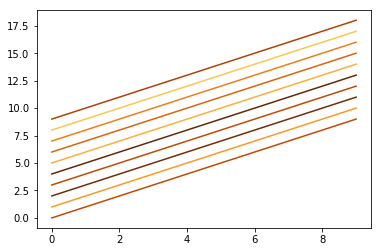

In [212]:
cmap = plt.cm.YlOrBr


for i in range(10):
    print(i)
    plt.plot(np.arange(10) + i,c = cmap(state_vs_rate['Obama, Barack'].iloc[i]))

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [222]:
from matplotlib.patches import Polygon

In [228]:
cmap(0)

(1.0, 0.9607843137254902, 0.9411764705882353, 1.0)

In [230]:
oba['AK']

0.7657776009029781

In [237]:
oba['MA']

0.5853234354184859

In [239]:
oba['RI']

0.7088038198939399

In [114]:
# 州全称对应缩写缩写
abbr = {'Commonwealth of Kentucky':'KY','Commonwealth of Massachusetts':'MA','Commonwealth of Pennsylvania':'PA',
        'State of Rhode Island and Providence Plantations':'RI'}

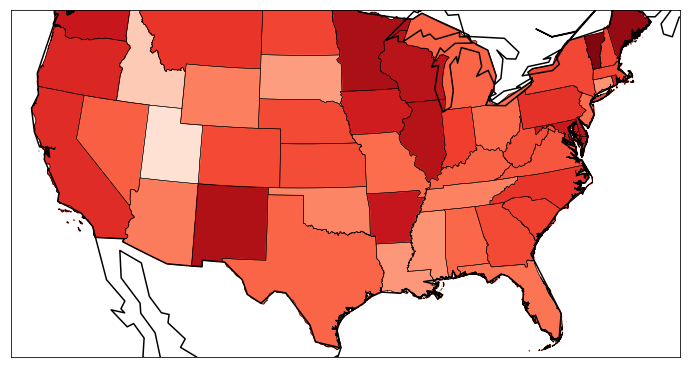

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

# hex16进制表示的颜色
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

'''llcrnrlon	所需地图域（度）的左下角经度。
llcrnrlat	所需地图域左下角的纬度（度）。
urcrnrlon	所需地图域（度）的右上角经度。
urcrnrlat	所需地图域右上角的纬度（度）。
'''

plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon = -122,
           llcrnrlat = 23.41,
           urcrnrlon = -64,
           urcrnrlat = 45,
           projection = 'lcc',
           lat_1 = 30,
           lon_0 = -100
            )

m.drawcoastlines(linewidth=1.5)
m.drawcountries(linewidth = 1.5)

# 地图读取了美国地图形状，m中就有各州的形状，数据
m.readshapefile('./USA/gadm36_USA_1',name = 'states')

colors = []
states = []

cmap = plt.cm.Reds

for shapeinfo in m.states_info:
    a = shapeinfo['VARNAME_1']
#     州的缩写
    s = a.split('|')[0]
    try:
        rate = oba[s]
        colors.append(cmap(rate))
        states.append(s)
    except:
        colors.append(cmap(oba[abbr[s]]))
        states.append(s)
# 州填充颜色
# seg州中的一部分区域，多边形
ax = plt.gca()
for n,seg in enumerate(m.states):
    c = rgb2hex(colors[n])
    poly = Polygon(seg,color = c )
    ax.add_patch(poly)
plt.savefig('./usa_states_rate.jpg')
plt.show()

In [232]:
colors = []
states = []
for shapeinfo in m.states_info:
    a = shape['VARNAME_1']
#     州的缩写
    s = a.split('|')[0]
    print('+++++++++++++++++++++++++++',s)
#     可以代表颜色
    try:
        rate = oba[s]
        print('----------------',rate)
    
        colors.append(cmap(rate))
        states.append(s)
    except:
        colors.append(cmap(0))
        states.append(s)

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.434456428225

---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
+++++++++++++++++++++++++++ WY
---------------- 0.4344564282250026
++++++++++++++++++++++++++

In [221]:
for n,seg in enumerate(m.states):
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727


5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726


In [219]:
oba['AL']

0.5073895604967883

In [217]:
for shape in m.states_info:
    print(shape['VARNAME_1'].split('|')[0])

AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
ND
OH
OH
OH
OH
OH
OH
OK
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
Commonwealth of Pennsylvania
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC
SC

In [234]:
for shape in m.states_info:
    print(shape['VARNAME_1'].split('|')[0])

AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AZ
AR
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CO
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
CT
C

NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
NC
ND
OH
OH
OH
OH
OH
OH
OK
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
OR
Commonwealth of Pennsylvania
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and Providence Plantations
State of Rhode Island and

In [47]:
# 州全称对应缩写缩写
abbr = {'Commonwealth of Kentucky':'KY','Commonwealth of Massachusetts':'MA','Commonwealth of Pennsylvania':'PA',
        'State of Rhode Island and Providence Plantations':'RI'}

![](usa_states_rate.jpg)

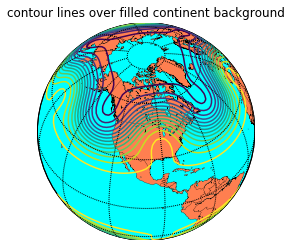

<Figure size 432x288 with 0 Axes>

In [242]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# 常规操作， 导入numpy, matplotlib.pyplot和basemap
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# 设置地图正射投影点为北纬50度， 西经100度，海岸线的分辨率为低 
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
# 画出海岸线（描边）
map.drawcountries(linewidth=0.25)
# 画出国境线（描边）
map.fillcontinents(color='coral',lake_color='aqua')
# 填充大陆, 大陆颜色为珊瑚色， 湖泊颜色为水色
map.drawmapboundary(fill_color='aqua')
# 画出地图边界，海洋区域颜色为水色
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# 每三十度画出经纬度线
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# 在规则网格上填充数据
x, y = map(lons*180./np.pi, lats*180./np.pi)
#投影到球面上
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
# 以x,y为基准协调画出wave+mean的轮廓线， 轮廓线条数为15. 参数详情见
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.contour.html
plt.title('contour lines over filled continent background')
plt.show()
plt.savefig('contour lines over continent.jpg')


In [247]:
from mpl_toolkits.basemap import Basemap, cm
# cm(colormap)库提供一系列彩色地图
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
#同上文，导入numpy, matplotlib.pyplot，导入netCDF4中的Dataset处理网络通用
#数据格式（net common data form）

nc = NetCDFFile('nws_precip_conus_20061222.nc')
#首先在http://water.weather.gov/precip/中下载2006年12月22日的美国本土
#（不含阿拉斯加与夏威夷）的降水量数据
#导入我们需要用到的dataset， 值得注意的是该网站17年3月后的数据格式更新， 
#通过查询变量名发现数据格式与之前有很大差异
print(nc.variables.keys())
# 输出查看数据中的变量名
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# 标准化降水量与提取经纬度参数
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#创建图像对象，设置图像大小与轴线起始位置 
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
#画立体投影图， 设置图形上下左右四个边界点经纬度参数坐标，中心点经纬度参
#数坐标,定义地图投影的球面半径(默认值为6370997米，近似于地球的半径），
#分辨率以及阈值 
# 注: area_thresh = 10000 意味着面积小于10000平方公里的湖泊等对象将不被作图
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# 画海岸线，州界， 国界线
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#以10度为间隔画出0度到北纬90度纬线， 并且在图像左侧设置纬线标签
meridians = np.arange(180.,360.,10.)
#以10度为间隔画出西经180度到本初子午线经线， 并且在图像下侧设置经线标签
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny)
# 经纬线空间均匀
x, y = m(lons, lats) 
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# 添加参数表，以x,y为基准画出data的轮廓线，等轮廓线参数为clevs，填充颜色画出填充后的轮廓线
cbar = m.colorbar(cs,location='bottom',pad="5%")
#添加色标, 每个色标占5%（一共20个色标）
cbar.set_label('mm')
# 添加标签 单位：毫米
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
# 添加图像名
plt.show()
plt.savefig('24hrs rainfall of 20061222 for CONUS.jpg')

FileNotFoundError: [Errno 2] No such file or directory: b'nws_precip_conus_20061222.nc'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


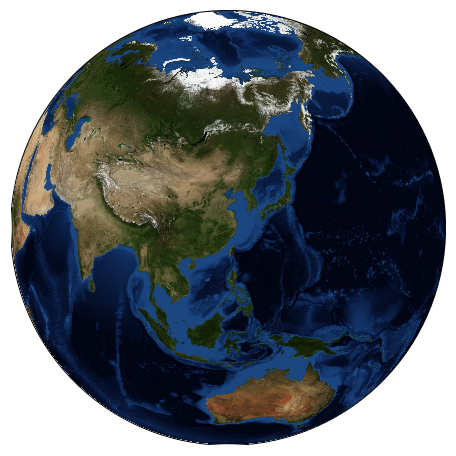

In [245]:
plt.figure(figsize=(8, 8))
#设新图
m = Basemap(projection='ortho', resolution=None, lat_0=30, lon_0=120)
#正射投影，投影原点设在了上海周边
m.bluemarble(scale=0.5);

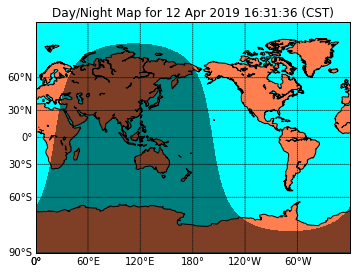

In [246]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
#python标准库 日期与时间
from dateutil import tz
#这是一个第三方库，拓展了标准时间库，tz = time zone
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# 新图对象
map = Basemap(projection='mill',lon_0=180)
#米勒投影法，此投影与墨卡托投影类似，只是极点区域的面积变形不如后者大。向极点靠近时，两
#条纬线的间距比墨卡托投影的小。这样就降低了面积变形程度，但这会导致局部形状和方向发生变形。
map.drawcoastlines()
#画海岸线
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
#numpy的作用只是提供了数组
map.drawmapboundary(fill_color='aqua')
#边界aqua(水）色
map.fillcontinents(color='coral',lake_color='aqua')
#大陆珊瑚色，湖泊水色
date = datetime.now()
#这个是local时间，我所在的芝加哥地区是(CST)central standard time
#如果想取格林尼治时间（Coordinated Universal Time），以上这句改为
#date = datetime.utcnow()即可
CS=map.nightshade(date)
#basemap中的nightshade函数用作将夜晚区域覆盖作阴影，具体参数不扩展
#有兴趣了解搜索basemap.nightshade即可
plt.title('Day/Night Map for %s (CST)' % date.strftime("%d %b %Y %H:%M:%S"))
#设置图名， datetime格式日/月/年/时/分/秒
plt.show()